**Description**

In [1]:
print ('Demo pytorch code for Computer vision and Image analysis : Course project')

Demo pytorch code for Computer vision and Image analysis : Course project


**Running environment options**

Colab: https://colab.research.google.com/

HPC: https://hpc.uni.lu/ (Get accounts early)

Gradients: https://gradient.run/free-gpu

**Libraries**

Pytorch: https://pytorch.org/

Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/ 

**Mounting Goolge Drive** 

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')

## Checking if the Google Drive mounted correctly
if(os.path.isdir('/content/drive/MyDrive/')):
  print('Google drive mounted')
  base_dir='/content/drive/MyDrive/Tutorial/'
else: 
  print('Google drive not mounted')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google drive mounted


**Loading data**

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np

## Transforms to be applied to the data (Some examples: torchvision.transforms.Resize(),transforms.Normalize())
## Read more: https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([transforms.ToTensor()])
transform = transforms.Compose([transforms.ToTensor()])

## Downloading and creating Dataset classes
## For custom classifications datasets refer: https://developpaper.com/detailed-explanation-of-the-use-of-imagefolder-in-pytorch/
## For Spark challenge: https://gitlab.uni.lu/spark-challenge/2021-utils/-/blob/master/utils.py
## train/val/test ref: https://blog.roboflow.com/train-test-split/  
trainset = torchvision.datasets.CIFAR10(root=base_dir+'CIFAR-10/', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root=base_dir+'CIFAR-10/', train=False, download=True, transform=transform)

## Defining classes
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')   

Files already downloaded and verified
Files already downloaded and verified



 Individual images from the dataset:


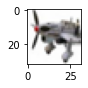

Label: plane


In [4]:
print('\n Individual images from the dataset:')

rand_idx=49
plt.figure(figsize=(1,1))
plt.imshow(transforms.ToPILImage()(trainset[rand_idx][0]))
plt.show()
print('Label:',classes[trainset[rand_idx][1]])

In [5]:
## Creating DataLoaders
## Read more: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
batch_size_train=256
batch_size_test=2048
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=False)


 Sample images from the dataset:


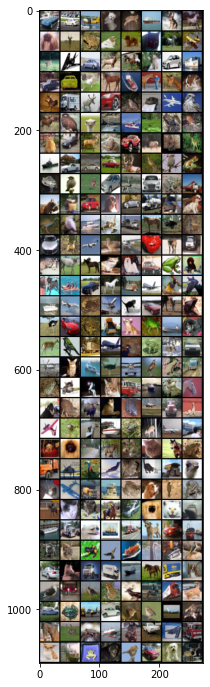

  car   car plane   dog   cat  ship   dog horse   dog  deer  frog   dog   dog   cat horse plane  deer plane   car  deer horse   cat   car  ship   car   car   cat horse  ship horse horse   dog   dog truck  deer   car  bird   cat plane  bird  deer  bird  bird  ship  ship  deer  frog  deer   cat   car horse  frog   car  deer   cat  deer  ship   car   car   car  deer  bird  bird  frog  frog  bird  deer   car  deer   car  frog truck horse  bird   car   dog   car truck horse   dog  bird  bird  ship plane truck horse  deer  deer   car   dog plane  bird plane   car  deer truck   cat horse horse   cat   dog   car  frog   dog   dog  ship   car horse  ship plane  bird horse  ship plane  frog plane   cat   car horse  frog  bird   car  frog truck   dog  frog  ship   dog  deer  bird truck plane  bird  frog  deer   car plane   cat  ship  bird plane  bird  frog truck  frog   cat horse   cat truck  ship  frog horse   dog  bird  deer   cat  frog plane truck   dog plane  bird  ship  ship  frog  deer plan

In [6]:
## Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## Show images
print('\n Sample images from the dataset:')
img_samples_grid=torchvision.utils.make_grid(images)
plt.figure(figsize=(12,12))
plt.imshow(transforms.ToPILImage()(img_samples_grid))
plt.show()
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size_train))) 

**Creating CNN model**

In [7]:
import torch.nn as nn
import torch.nn.functional as F

## Defining a convolutional neural network
## Available layers: https://pytorch.org/docs/stable/nn.html
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

**Defining loss function**

In [8]:
import torch.optim as optim

## Defining loss function to be used
criterion = nn.CrossEntropyLoss()
## Optimizer to be used (Some commonly used optimizers are: SGD,Adam etc)
optimizer = optim.Adam(net.parameters(),lr=0.001)

In [9]:
def testing():
  correct = 0
  total = 0
  ## Calculating classification accuracy on test dataset
  for data_test in testloader:
          inputs_test, labels_test = data_test
          outputs_test = net(inputs_test)

          predicted_test = torch.argmax(outputs_test.data, 1)
          total += labels_test.size(0)
          correct += (predicted_test == labels_test).sum().item()

  return (correct,total)

**Training**

In [10]:
## loop over the dataset multiple times
nb_epoch=300
loss_per_epoch_train = []
acc_per_epoch_test=[]

correct,total=testing()
print('test accuracy before training',(100 * correct / total))  

print('============================Training: Start============================')
for epoch in range(nb_epoch):  

        loss_train=0
        for i, data in enumerate(trainloader, 0):
            
            ## Getting inputs
            inputs, labels = data

            ## Gradients set to zero
            optimizer.zero_grad()

            ## Forward pass
            outputs = net(inputs)

            ## Calculating loss
            loss = criterion(outputs, labels)

            ## Calculating gradients
            loss.backward()
            loss_train=loss_train+loss.item()

            ## Updating weights
            optimizer.step()
            
        correct,total=testing()
        print('epoch:',epoch,'train loss:',loss_train,'test acc:',(100 * correct / total))  
        loss_per_epoch_train.append(loss_train)
        acc_per_epoch_test.append((100 * correct / total))

print('============================Training: End============================')


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


test accuracy before training 9.87
============================Training: Start============================
epoch: 0 train loss: 379.97149991989136 test acc: 36.9
epoch: 1 train loss: 323.54464304447174 test acc: 42.85
epoch: 2 train loss: 301.61899852752686 test acc: 46.3
epoch: 3 train loss: 287.161455988884 test acc: 48.07
epoch: 4 train loss: 274.00111985206604 test acc: 50.37
epoch: 5 train loss: 266.08380591869354 test acc: 52.55
epoch: 6 train loss: 256.88996410369873 test acc: 52.9
epoch: 7 train loss: 248.4105396270752 test acc: 55.03
epoch: 8 train loss: 242.98280489444733 test acc: 54.92
epoch: 9 train loss: 237.72180306911469 test acc: 56.64
epoch: 10 train loss: 233.8071266412735 test acc: 56.08
epoch: 11 train loss: 229.46710270643234 test acc: 57.46
epoch: 12 train loss: 225.59185487031937 test acc: 56.37
epoch: 13 train loss: 221.67141753435135 test acc: 58.42
epoch: 14 train loss: 217.7323373556137 test acc: 58.19
epoch: 15 train loss: 214.2461792230606 test acc: 59.51


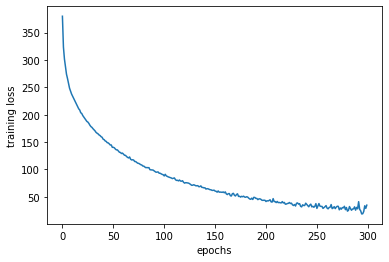

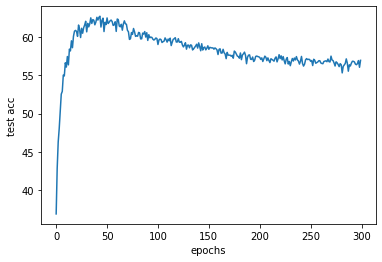

In [11]:
plt.plot(loss_per_epoch_train)
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.show()

plt.plot(acc_per_epoch_test)
plt.xlabel('epochs')
plt.ylabel('test acc')
plt.show()

**Saving the model**


In [12]:
PATH = base_dir+'models/cifar_net.pth'
torch.save(net.state_dict(), PATH)

**Restoring the model**

In [13]:
model_restored = Net()
model_restored.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**Testing**

In [14]:
## Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

## Collect the correct predictions for each class
for data in testloader:
        images, labels = data
        outputs = model_restored(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

## Print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,accuracy))

Accuracy for class plane is: 65.9 %
Accuracy for class car   is: 71.9 %
Accuracy for class bird  is: 44.5 %
Accuracy for class cat   is: 35.0 %
Accuracy for class deer  is: 44.1 %
Accuracy for class dog   is: 42.5 %
Accuracy for class frog  is: 66.2 %
Accuracy for class horse is: 61.8 %
Accuracy for class ship  is: 69.5 %
Accuracy for class truck is: 68.2 %
